In [3]:
import os
import pandas as pd  
from tensorflow.keras.utils import plot_model
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split




['test.csv', 'train.csv', 'sample_submission.csv']


In [ ]:
print(os.listdir("../input/digit-recognizer"))


train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
X = train.drop("label",axis=1).values.reshape(-1,28,28,1)
y = train["label"].values
print(y)
X_test = test.values.reshape(-1,28,28,1)

[1 0 1 ... 7 6 9]


In [5]:


X = X.astype('float32')
X_test = X_test.astype('float32')

X = X/255.0
X_test = X_test/255.0

y = tensorflow.keras.utils.to_categorical(y,10)  # 把y变成 one-hot 向量
print(y,y.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]] (42000, 10)


In [6]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=1)

print(f"{X_train.shape} {y_train.shape} {X_val.shape} {y_val.shape}")

(33600, 28, 28, 1) (33600, 10) (8400, 28, 28, 1) (8400, 10)


In [12]:

num_of_models = 1
model = [0]*num_of_models

for j in range(num_of_models):
    
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(24,kernel_size=(3,3),padding='same',activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(128,kernel_size=4,activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10,activation='softmax'))
    
    model[j].compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    

In [15]:

plot_model(model[0], to_file=r'./modle1.png', show_shapes=True,show_layer_names=True)
print("done")

done


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1
            )
datagen.fit(X)

In [29]:
epochs = 20
history = [0]*num_of_models
print(num_of_models) # 模型个数，类似随机森林

1


In [32]:
for j in range(num_of_models):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1,random_state=7)
    history[j] = model[j].fit_generator(datagen.flow(X_train,y_train,batch_size=64),
                                       epochs=epochs,validation_data=(X_val,y_val),
                                       verbose=1)

Epoch 1/20
591/591 [==============================] - 93s 157ms/step - loss: 0.0653 - acc: 0.9801 - val_loss: 0.0448 - val_acc: 0.9874
Epoch 2/20
591/591 [==============================] - 97s 164ms/step - loss: 0.0571 - acc: 0.9826 - val_loss: 0.0355 - val_acc: 0.9898
Epoch 3/20
591/591 [==============================] - 91s 154ms/step - loss: 0.0532 - acc: 0.9837 - val_loss: 0.0419 - val_acc: 0.9902
Epoch 4/20
591/591 [==============================] - 97s 163ms/step - loss: 0.0513 - acc: 0.9838 - val_loss: 0.0454 - val_acc: 0.9898
Epoch 5/20
591/591 [==============================] - 94s 159ms/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0456 - val_acc: 0.9893
Epoch 6/20
591/591 [==============================] - 92s 155ms/step - loss: 0.0452 - acc: 0.9857 - val_loss: 0.0305 - val_acc: 0.9924
Epoch 7/20
591/591 [==============================] - 96s 163ms/step - loss: 0.0425 - acc: 0.9872 - val_loss: 0.0273 - val_acc: 0.9917
Epoch 8/20
591/591 [==============================] - 9

# Visualization:

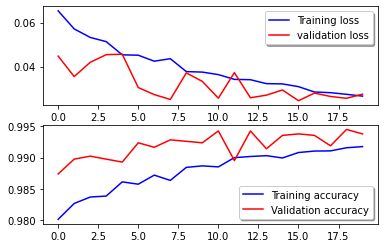

In [36]:
import matplotlib.pyplot as plt
#history = history[0]

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.savefig('./train_curve.jpg',dpi=400,bbox_inches = 'tight')

# save the result:

In [19]:
import numpy as np
import pandas as pd
results = np.zeros((X_test.shape[0],10))
for j in range(num_of_models):
    results = results+model[j].predict(X_test) 
results = np.argmax(results,axis=1) # choose the max one
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)
submission.to_csv('ENSEMBLE.csv',index=False)

NameError: name 'nn' is not defined

# Random Forest:

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [ ]:
trainPath='./input/digit-recognizer/train.csv'
testPath='./input/digit-recognizer/test.csv'

rawData=pd.read_csv(trainPath).values
trainData=rawData[:,1:]
trainLabel=rawData[:,0]
testData= pd.read_csv(testPath).values
X=trainData
Y=trainLabel
 
clf=RandomForestClassifier(n_estimators=100)
clf=clf.fit(X,Y)
testLabel=clf.predict(testData)
 
#训练结果保存
df=pd.DataFrame(testLabel,columns=['label'])
df.to_csv('testLabel_rf.csv',header=True,index=False)